In [130]:
# Libraries
import os
import IPython
import numpy as np
import random as rn
import matplotlib.pyplot as plt

# Background color of matplotlib graphics 
plt.rcParams['axes.facecolor'] = 'black'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/Users/ivesbrunner/Documents/Studium/01_Bachelor/04_Semester/04_ScientificProgramming/scientific_programming/Week_09/challenge


In [131]:
class GameAgent:
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        self.unique_id = unique_id
        self.model = model

    # Method to move the agent on the grid
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)


    # Step method (action the agent takes when it is activated by the schedule)
    def step(self):
        self.move()

In [132]:
class GridModel:
    """A model with some number of agents."""

    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.num_agents = 2
        self.grid = np.zeros((width, height), dtype=object)  # Use object dtype for storing agents

        # Create agents using MoneyAgent class
        for i in range(self.num_agents):
            a = GameAgent(i, self)
            # Add the agent to a random grid cell
            x = rn.randrange(0, width)
            y = rn.randrange(0, height)
            self.grid[x, y] = a

    def plot(self):
        """Visualizes the grid."""
        fig, ax = plt.subplots(figsize=(5, 5))
        agent_coords = [(x, y) for x in range(self.width) for y in range(self.height) if self.grid[x, y] is not None]
        ax.plot([y for _, y in agent_coords], [x for x, _ in agent_coords], 'ro', markersize=5)  # Adjusted marker size for visibility
        plt.grid(True)
        plt.xlim(0, self.width)
        plt.ylim(0, self.height)
        plt.title('Grid with Agents Plotted as Red Circles')
        plt.show()

    


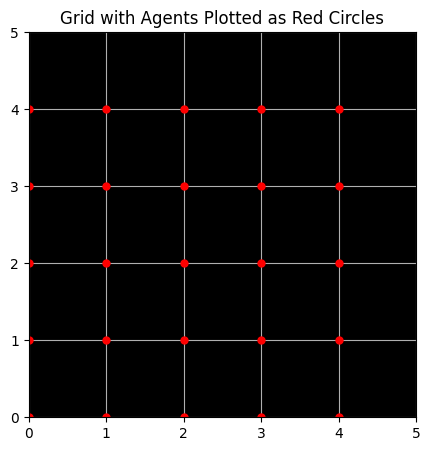

In [133]:
x = input("Enter width:")
y = input("Enter height:")

model = GridModel(int(x), int(y))
model.plot();